In [8]:
import numpy as np
import scipy.spatial as spatial
import shapes
import plotly.graph_objects as go
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:

def supercoords(params, shape=(50,50)):
    '''Returns coordinates of a parametrized 3D supershape.
    
    See
    http://paulbourke.net/geometry/supershape/
    https://en.wikipedia.org/wiki/Superformula
    Params
    ------
    params: 1x6 or 2x6 array
        Parameters of the two supershapes. If 1x6 the same
        parameters will be used for the second supershape.
        The order of the parameters is as follows:
        m: float
            long/lat frequency.
            Defaults to 0.01
        a: float
            long/lat inverse amplitude of first term.
            Defaults to 1.
        b: float
            long/lat inverse amplitude of second term
            Defaults to 1.
        n1: float
            First exponent. Defaults to 0.1
        n2: float
            Second exponent. Defaults to 0.01
        n3: float
            Third exponent. Actually (-1/n3). Defaults to 10.0
    shape : tuple
        longitude/latitude resolution (U,V)
    Returns
    -------
    x: UxV array
        x coordinates for each long/lat point
    y: UxV array
        y coordinates for each long/lat point
    z: UxV array
        z coordinates for each long/lat point
    '''
    
    params = np.atleast_2d(params)
    if params.shape[0] == 1:
        params = np.tile(params, (2,1))

    sf = lambda alpha, sp: (
        np.abs(np.cos(sp[0]*alpha/4.)/sp[1])**sp[4] + 
        np.abs(np.sin(sp[0]*alpha/4.)/sp[2])**sp[5]
    )**(-1/sp[3])

    u = np.linspace(-np.pi, np.pi, shape[0]) # long., theta
    v = np.linspace(-np.pi/2, np.pi/2, shape[1]) # lat., phi
        
    g = np.meshgrid(v, u)
    uv = np.stack((g[1],g[0]),-1)
    r1 = sf(uv[...,0], params[0])
    r2 = sf(uv[...,1], params[1])    

    x = r1 * np.cos(u)[:,None] * r2 * np.cos(v)[None, :]
    y = r1 * np.sin(u)[:,None] * r2 * np.cos(v)[None, :]
    z = r2 * np.sin(v)[None, :]

    return x,y,z

In [28]:
x,y,z = supercoords([0.1, 1, 1, 0.1, 1, .1])

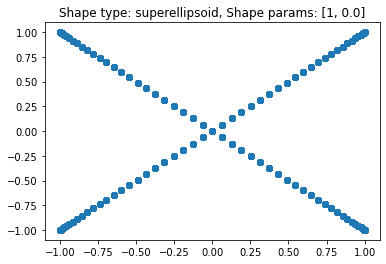

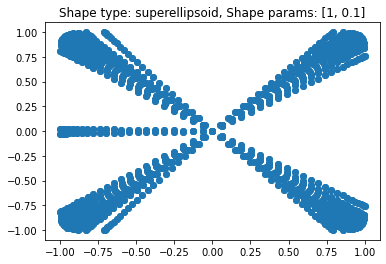

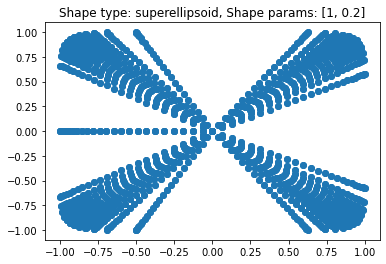

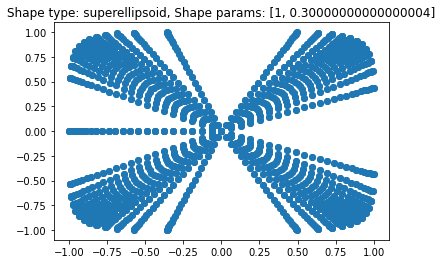

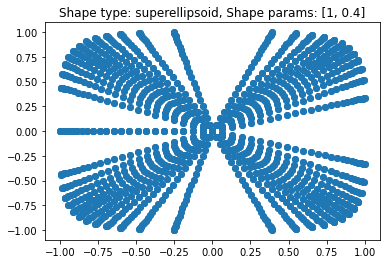

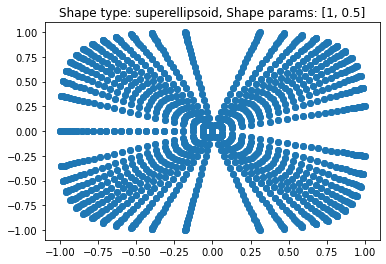

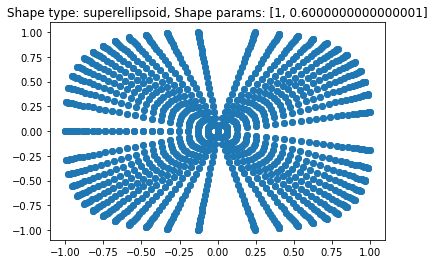

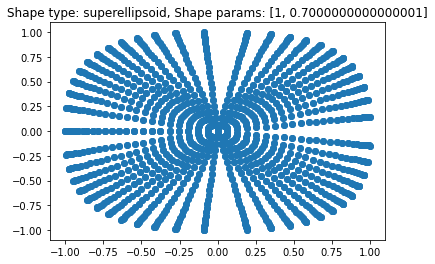

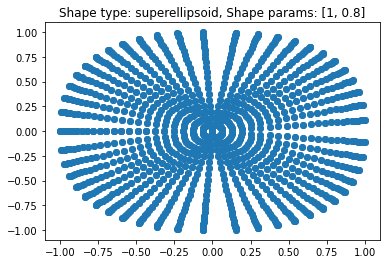

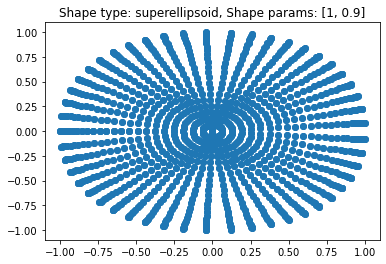

In [41]:
for i in np.arange(0.0, 1, .1):
    shape_type = "superellipsoid"
    shape_params = [1, i]
    s = shapes.SuperQuadric(shape_type, shape_params, [1, 1, 1, 2])
    x, y, z = s.points
    plt.scatter(x, y)
    plt.title(f"Shape type: {shape_type}, Shape params: {shape_params}")
    plt.show()

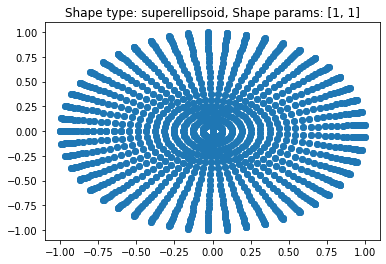

In [36]:
plt.scatter(x, y)
plt.title(f"Shape type: {shape_type}, Shape params: {shape_params}")
plt.show()

In [ ]:
shape_type = "superellipsoid"
shape_params = [1, 1]
s = shapes.SuperQuadric(shape_type, shape_params, [1, 1, 1, 2])
x, y, z = s.points

plt.scatter(x, y)
plt.title(f"Shape type: {shape_type}, Shape params: {shape_params}")
plt.show()

In [249]:
s = shapes.SuperQuadric("superellipsoid", [2, 2], [1, 1, 1, 3], n_points=50)
points = s.compute_points()
print(points)
faces = s.compute_faces()
fig = go.Figure(data=[go.Scatter3d(x=points[0], y=points[1], z=points[2], opacity=0.50)])
fig.show()



(array([-3.74939946e-33, -3.68808715e-33, -3.50816067e-33, ...,
       -3.50816067e-33, -3.68808715e-33, -3.74939946e-33]), array([-5.62319851e-65, -6.13123114e-35, -2.41238790e-34, ...,
        2.41238790e-34,  6.13123114e-35,  5.62319851e-65]), array([-1., -1., -1., ...,  1.,  1.,  1.]))


In [240]:
def cos_exp(x, exp):
    return np.sign(np.cos(x)) * np.abs(np.cos(x)) ** exp

def sin_exp(x, exp):
    return np.sign(np.sin(x)) * np.abs(np.sin(x))** exp

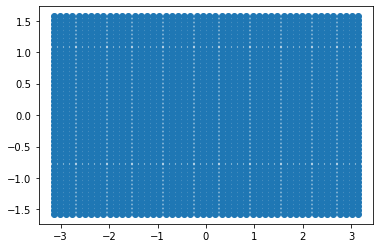

In [241]:
v = np.linspace(-np.pi / 2, np.pi / 2, 50)
u = np.linspace(-np.pi, np.pi, 50)
w = .01

u, v = np.meshgrid(u,v, indexing="ij")
u = u.flatten()
v = v.flatten()

plt.scatter(u, v)

In [242]:
import matplotlib.pyplot as plt
v = np.linspace(-np.pi / 2, np.pi / 2, 50)
u = np.linspace(-np.pi, np.pi, 50)

s, t = .1, 0.5

u, v = np.meshgrid(u,v, indexing="xy")
u = u.flatten()
v = v.flatten()

x = cos_exp(v, s) * cos_exp(u, t)
y = cos_exp(v, s) * sin_exp(u, t)
z = sin_exp(v, s)

In [243]:
from scipy.spatial import Delaunay
u = np.linspace(0, 50, 50)
v = np.linspace(0, 50, 50)
u, v = np.meshgrid(u, v, indexing="ij")
u = u.flatten()
v = v.flatten()
points2d = np.vstack([u, v]).T
triangulation = Delaunay(points2d)
#triangulation.lift_points(points2d)
faces = triangulation.simplices
print(faces.shape)

(4802, 3)


In [245]:
import os


In [246]:
os.getcwd()

'/Users/yoni/Projects/CommonFate'

In [247]:
np.save("faces.npy", faces)

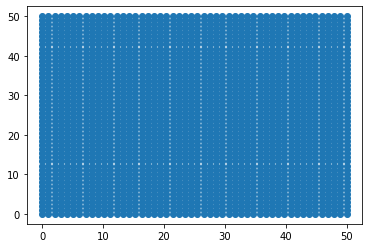

In [236]:
plt.scatter(u, v)

In [237]:
fig = go.Figure(data=[
    go.Mesh3d(
        # 8 vertices of a cube
        x=x,
        y=y,
        z=z,
        colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
        # Intensity of each vertex, which will be interpolated and color-coded
        # i, j and k give the vertices of triangles
        i = faces[:, 0],
        j = faces[:, 1],
        k = faces[:, 2],
        name='y',
        showscale=True
    )
])
fig.show()

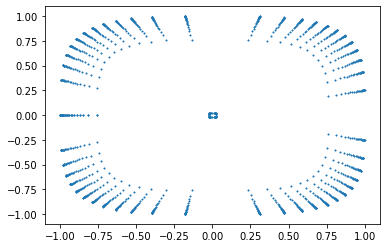

In [238]:
plt.scatter(x, y, s=0.5)

In [67]:
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, opacity=0.50, marker=dict(size=0.01))])
fig.show()